In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# counts matrix
X = pd.read_csv("all_salmon_norm.csv")
df = pd.read_csv("all_salmon_norm.csv")
#X = pd.DataFrame(np.random.random((1000,20)))
cols = list(X)
cols = cols[1:]

# remove uneccessary columns, don't need to do this in stats.py
X.drop([col for col in X.columns if "mRNASeq" not in col], axis=1, inplace=True)

# scale dataset to center around 0,0
X_row_mean = X.mean(axis=1)
X_row_std = X.std(axis=1)
X_scaled = (X.sub(X_row_mean,axis=0)).div(X_row_std,axis=0)
assert np.allclose(X_scaled.mean(axis=1),0)
assert np.allclose(X_scaled.std(axis=1),1)
X_scaled.shape

(27881, 96)

In [23]:
# perform PCA
n_samples = len(X.index)
n_features = len(X.columns)
n_components = min(n_samples, n_features)
pca = PCA(n_components)
transformed = pca.fit_transform(X_scaled.T)

print(pca.components_[0:])

# The amount of variance explained by each of the selected components
print('Variance: %s' % str(pca.explained_variance_))

# Percentage of variance explained by each of the selected components
print('Variance ratio: %s' % str(pca.explained_variance_ratio_))

[[ -4.27777781e-03  -4.88550365e-03  -1.57253718e-03 ...,   9.08615582e-03
   -3.41719185e-03  -3.13919052e-03]
 [  6.15281711e-03   6.12633324e-03   6.04297094e-04 ...,  -8.31642507e-04
   -6.51062311e-04  -2.25184914e-03]
 [ -4.41959613e-03   2.93634230e-03   2.40323463e-04 ...,  -6.14686847e-04
   -1.00481744e-04   8.39874510e-03]
 ..., 
 [  4.74704444e-04   4.46184391e-03  -4.41669317e-03 ...,   6.02712222e-03
    1.43583832e-02  -1.00651725e-02]
 [  8.79872676e-03   4.54023485e-03   6.50621673e-03 ...,   3.83798042e-03
    5.45492191e-03   1.38914743e-02]
 [  1.22214112e-01  -3.78363417e-01  -1.41528841e-01 ...,   9.49770600e-04
   -3.39520456e-03   3.71341249e-03]]
Variance: [  9.78960477e+03   3.00479442e+03   1.80825527e+03   1.47126507e+03
   1.26311665e+03   9.15555322e+02   8.01656801e+02   5.84696504e+02
   5.07569221e+02   3.57167909e+02   3.30197949e+02   3.16510619e+02
   2.78854351e+02   2.33744469e+02   2.24587438e+02   2.10795095e+02
   1.92311384e+02   1.84512735e+02

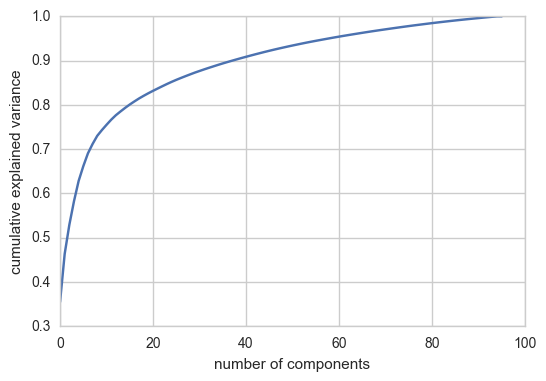

In [24]:
# plot results
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Populating the interactive namespace from numpy and matplotlib


/Users/Mojito/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(96, 96)

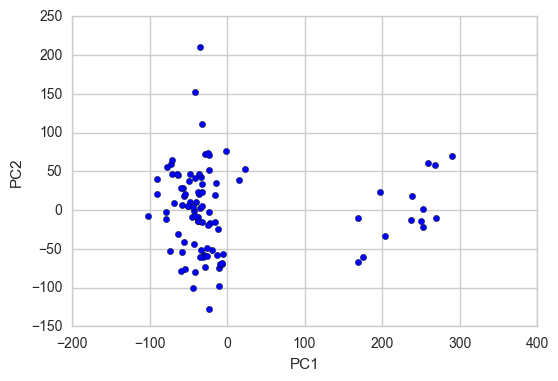

In [25]:
################################# Scatter PCA plot tester
%pylab inline
scatter(transformed[:,0],transformed[:,1])
xlabel('PC1')
ylabel('PC2')
transformed.shape

61
35


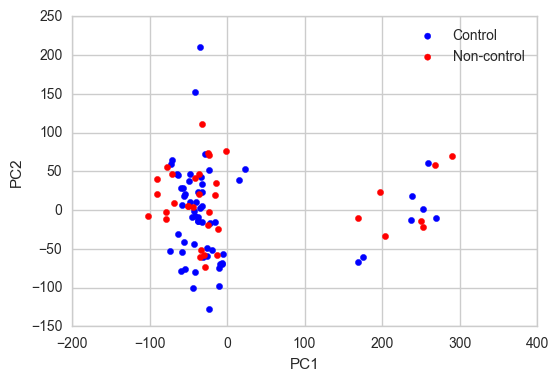

In [67]:
################################# Scatter PCA plot tester (colors for different values)
# 96 rows
b = pd.DataFrame(cols)
b['pc1'] = transformed[:,0]
b['pc2'] = transformed[:,1]
b['status'] = b[0].astype(str).str[0]

c = pd.DataFrame()
h = pd.DataFrame()

# since the non control might not be H
for i in range(len(b)):
    if b['status'][i] == 'C':
        c = c.append(b.loc[[i]])
    else:
        h = h.append(b.loc[[i]])
print(len(c))
print(len(h))

ax1 = scatter(c['pc1'], c['pc2'], color='b')
ax2 = scatter(h['pc1'], h['pc2'], color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend([ax1, ax2], ["Control","Non-control"])


0        pc1        pc2 status
2  H_0006_BA9_mRNASeq -90.821926  21.207486      H
3  C_0053_BA9_mRNASeq -57.486471   7.133808      C

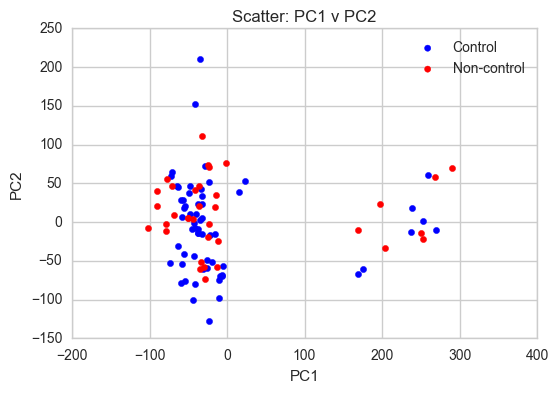

In [63]:
b = pd.DataFrame(cols)
b['pc1'] = transformed[:,0]
b['pc2'] = transformed[:,1]
b['status'] = b[0].astype(str).str[0]
c = b.loc[b['status'] == 'C']
h = b.loc[b['status'] == 'H']
ax1 = scatter(c['pc1'], c['pc2'], color='b')
ax2 = scatter(h['pc1'], h['pc2'], color='r')
plt.title('Scatter: PC1 v PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend([ax1, ax2], ["Control","Non-control"])
transformed.shape

e = pd.DataFrame()
e = e.append(b.loc[[2]])
e = e.append(b.loc[[3]])
e

(96, 96)

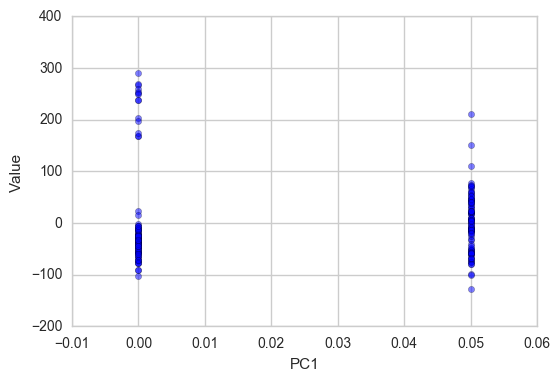

In [55]:
plt.scatter(transformed[:,0]*[0],transformed[:,0],alpha=0.5)
plt.scatter((transformed[:,0]*[0])+0.05,[transformed[:,1]],alpha=0.5)
xlabel('PC1')
ylabel('Value')
transformed.shape

In [70]:
##################################PCA PLOT FUNCTION
def PCA_plot(matrix):
    X = matrix
    
    # To drop gene id which is usually in column[0]
    cols = list(X)
    cols = cols[1:]
    X = X[cols]

    X_row_mean = X.mean(axis=1)
    X_row_std = X.std(axis=1)
    X_scaled = (X.sub(X_row_mean,axis=0)).div(X_row_std,axis=0)
    assert np.allclose(X_scaled.mean(axis=1),0)
    assert np.allclose(X_scaled.std(axis=1),1)
    print('X scaled shape: %s' % str(X_scaled.shape))
    
    # Perform PCA
    n_samples = len(X.index)
    n_features = len(X.columns)
    n_components = min(n_samples, n_features)
    pca = PCA(n_components)
    transformed = pca.fit_transform(X_scaled.T)
    
    # The amount of variance explained by each of the selected components
    print('Variance: %s' % str(pca.explained_variance_))
    # Percentage of variance explained by each of the selected components
    print('Variance ratio: %s' % str(pca.explained_variance_ratio_))
    
    # Plot variance results
    sns.set_style("whitegrid")
    # Plot cumsum variance
    f, ax = plt.subplots()
    ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title('PCA cumulative explained variance')
    plt.show()
    
    # Plot scatterplot of PCA
    b = pd.DataFrame(cols)
    b['pc1'] = transformed[:,0]
    b['pc2'] = transformed[:,1]
    b['status'] = b[0].astype(str).str[0]
    c = pd.DataFrame()
    h = pd.DataFrame()
    for i in range(len(b)):
        if b['status'][i] == 'C':
            c = c.append(b.loc[[i]])
        else:
            h = h.append(b.loc[[i]])
    ax1 = scatter(c['pc1'], c['pc2'], color='b')
    ax2 = scatter(h['pc1'], h['pc2'], color='r')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend([ax1, ax2], ["Control","Non-control"])
    plt.title('Scatter: PC1 v PC2')
    transformed.shape
    
    print()
    # Plot PCA strip plot and swarm plot
    pca = pd.DataFrame(cols)
    pca['Values'] = pd.DataFrame(transformed[:,0])
    pca['PCA'] = 'PCA' + str(1)
    pca['status'] = pca[0].astype(str).str[0]
    
    for i in range(4):
        pca1 = pd.DataFrame(cols)
        pca1['Values'] = pd.DataFrame(transformed[:,i+1])
        pca1['PCA'] = 'PCA' + str(i+2)
        pca1['status'] = pca1[0].astype(str).str[0]
        pca = pd.concat([pca,pca1])
    print()
    f, ax3 = plt.subplots()
    ax3 = sns.swarmplot(x='PCA', y='Values', hue='status', data=pca)
    ax3.set_title('Swarmplot PCA')
    print()
    f, ax4 = plt.subplots()
    ax4 = sns.stripplot(x='PCA', y='Values', hue='status', data=pca)
    ax4.set_title('Stripplot PCA')

X scaled shape: (27881, 95)
Variance: [  9.80870428e+03   2.99193887e+03   1.81036372e+03   1.45829318e+03
   1.26627169e+03   9.18304346e+02   8.03691452e+02   5.86106440e+02
   5.08994605e+02   3.58327978e+02   3.30989174e+02   3.17423010e+02
   2.79274828e+02   2.34301623e+02   2.24568676e+02   2.11484739e+02
   1.92746875e+02   1.84883872e+02   1.67319819e+02   1.58999684e+02
   1.49941984e+02   1.44588523e+02   1.42090049e+02   1.39609937e+02
   1.32601974e+02   1.25893661e+02   1.17867747e+02   1.14131794e+02
   1.12142727e+02   1.09285611e+02   1.00962841e+02   9.98576087e+01
   9.58444053e+01   9.36640908e+01   9.24474264e+01   8.99666950e+01
   8.64136544e+01   8.41813793e+01   8.28671589e+01   8.15293277e+01
   7.90379775e+01   7.83577632e+01   7.67075397e+01   7.46726801e+01
   7.38760887e+01   7.19350551e+01   6.97661408e+01   6.72584861e+01
   6.51803898e+01   6.49468587e+01   6.27411845e+01   6.11497344e+01
   6.04708642e+01   5.88573347e+01   5.66588115e+01   5.54091226e

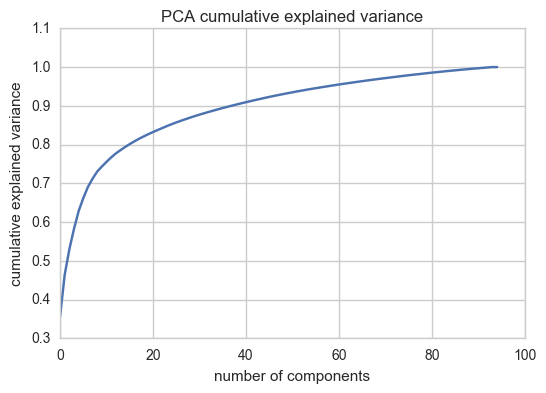

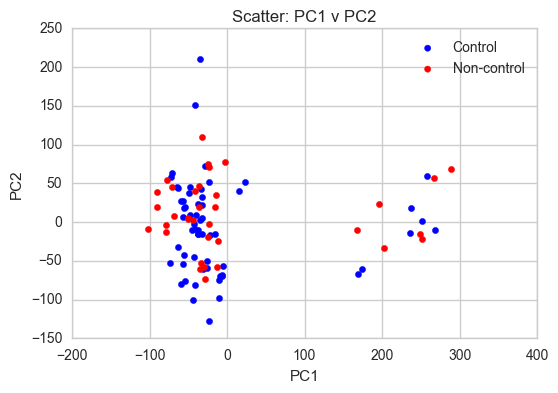

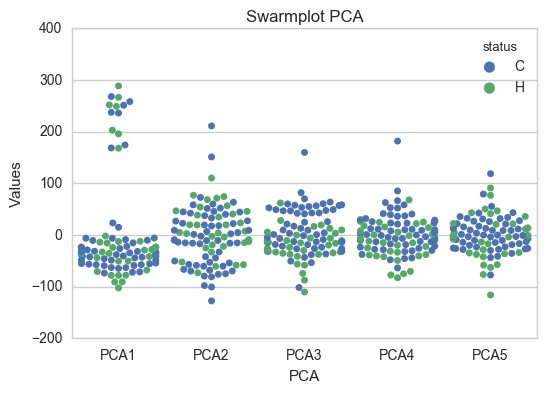

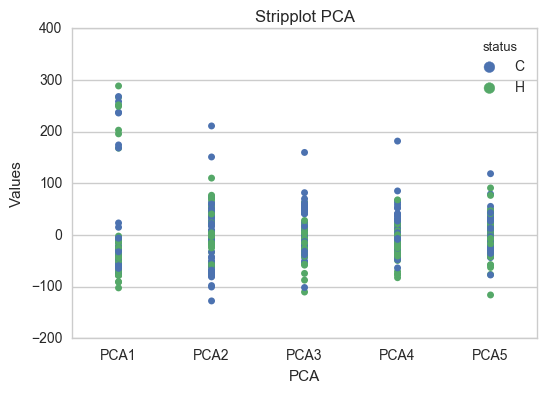

In [71]:
PCA_plot(X)

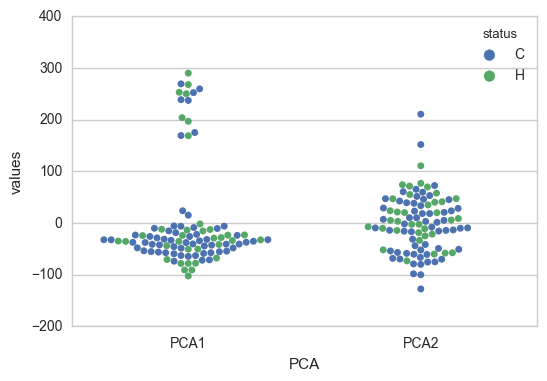

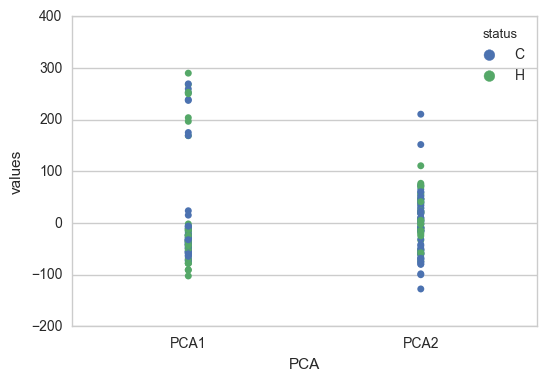

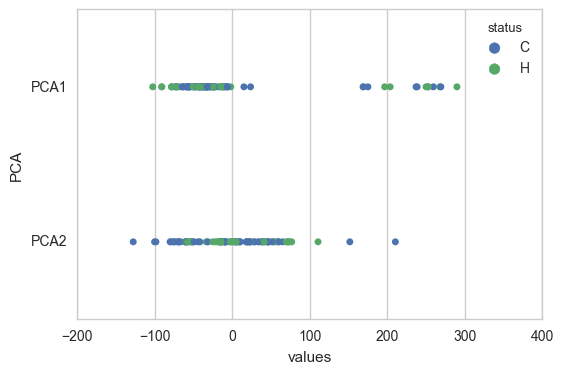

In [29]:
############### PCA swarmplot/Stripplot tester (2 PCA tester)
# X = PCA plots
# Y = Sample?
pca1 = pd.DataFrame(cols)
pca1['values'] = pd.DataFrame(transformed[:,0])
pca1['PCA'] = 'PCA1'
pca1['status'] = pca1[0].astype(str).str[0]
pca1.head()

pca2 = pd.DataFrame(cols)
pca2['values'] = pd.DataFrame(transformed[:,1])
pca2['PCA'] = 'PCA2'
pca2['status'] = pca2[0].astype(str).str[0]
pca2.head()

r = pd.concat([pca1,pca2])

sns.set_style("whitegrid")

f, ax = plt.subplots()
ax = sns.swarmplot(x='PCA', y='values', hue='status', data=r)
f, ax1 = plt.subplots()
ax1 = sns.stripplot(x='PCA', y='values', hue='status', data=r)
f, ax2 = plt.subplots()
ax2 = sns.stripplot(x='values', y='PCA',hue='status', data=r)

In [30]:
############### PCA swarmplot/Stripplot tester (FOR ALL SAMPLES)
pca = pd.DataFrame(cols)
pca['values'] = pd.DataFrame(transformed[:,0])
pca['PCA'] = 'PCA' + str(1)
pca['status'] = pca[0].astype(str).str[0]

for i in range(len(transformed)-1):
    pca1 = pd.DataFrame(cols)
    pca1['values'] = pd.DataFrame(transformed[:,i+1])
    pca1['PCA'] = 'PCA' + str(i+2)
    pca1['status'] = pca1[0].astype(str).str[0]
    pca = pd.concat([pca,pca1])

#pca.to_csv('PCA.csv')
pca

0        values    PCA status
0          C_0083_BA9_mRNASeq -1.876796e+01   PCA1      C
1          C_0010_BA9_mRNASeq -5.641705e+01   PCA1      C
2          H_0006_BA9_mRNASeq -9.082193e+01   PCA1      H
3          C_0053_BA9_mRNASeq -5.748647e+01   PCA1      C
4          H_0689_BA9_mRNASeq -3.265709e+01   PCA1      H
5          C_0024_BA9_mRNASeq -3.747085e+01   PCA1      C
6          H_0709_BA9_mRNASeq -9.091493e+01   PCA1      H
7          H_0014_BA9_mRNASeq  1.689101e+02   PCA1      H
8   C_0029_BA9_mRNASeq_REPEAT -6.298669e+01   PCA1      C
9   C_0021_BA9_mRNASeq_REPEAT -3.249952e+01   PCA1      C
10         C_0074_BA9_mRNASeq  1.692388e+02   PCA1      C
11         C_0031_BA9_mRNASeq -7.391064e+01   PCA1      C
12         C_0107_BA9_mRNASeq  2.523521e+02   PCA1      C
13         C_0005_BA9_mRNASeq -3.784490e+01   PCA1      C
14         C_0082_BA9_mRNASeq -5.751369e+01   PCA1      C
15         H_1106_BA9_mRNASeq  2.038275e+02   PCA1      H
16         C_0032_BA9_mRNASeq -5.766663e+00   PCA1      C
17         H_0821_BA9_mRNASeq  2.679542e+02   PCA1      H
18         H_0695_BA9_mRNASeq -1.819829e+00   PCA1      H
19         C_0019_BA9_mRNASeq -4.809931e+01   PCA1      C
20         H_0723_BA9_mRNASeq -6.790661e+01   PCA1      H
21         C_0060_BA9_mRNASeq -3.344390e+01   PCA1      C
22         H_0750_BA9_mRNASeq -5.062067e+01   PCA1      H
23  C_0014_BA9_mRNASeq_REPEAT -2.198697e+01   PCA1      C
24         H_0010_BA9_mRNASeq -2.928669e+01   PCA1      H
25         H_0002_BA9_mRNASeq -2.339409e+01   PCA1      H
26         C_0022_BA9_mRNASeq -6.318292e+01   PCA1      C
27         C_0037_BA9_mRNASeq -5.447196e+01   PCA1      C
28         C_0029_BA9_mRNASeq -7.208838e+01   PCA1      C
29         C_0018_BA9_mRNASeq  2.371955e+01   PCA1      C
..                        ...           ...    ...    ...
66         H_0740_BA9_mRNASeq  4.393910e-14  PCA96      H
67         C_0003_BA9_mRNASeq  4.393910e-14  PCA96      C
68         H_0656_BA9_mRNASeq  4.393910e-14  PCA96      H
69         C_0054_BA9_mRNASeq  4.393910e-14  PCA96      C
70         C_0004_BA9_mRNASeq  4.393910e-14  PCA96      C
71         C_0026_BA9_mRNASeq  4.393910e-14  PCA96      C
72         C_0017_BA9_mRNASeq  4.393910e-14  PCA96      C
73         H_0802_BA9_mRNASeq  4.393910e-14  PCA96      H
74         H_1105_CAP_mRNASeq  4.393910e-14  PCA96      H
75         C_0021_BA9_mRNASeq  4.393910e-14  PCA96      C
76         C_0070_BA9_mRNASeq  4.393910e-14  PCA96      C
77         C_0014_BA9_mRNASeq  4.393910e-14  PCA96      C
78         H_0681_BA9_mRNASeq  4.393910e-14  PCA96      H
79         H_0539_BA9_mRNASeq  4.393910e-14  PCA96      H
80         C_0062_BA9_mRNASeq  4.393910e-14  PCA96      C
81         H_0005_BA9_mRNASeq  4.393910e-14  PCA96      H
82         C_0012_BA9_mRNASeq  4.393910e-14  PCA96      C
83         C_0050_BA9_mRNASeq  4.393910e-14  PCA96      C
84         H_0791_BA9_mRNASeq  4.393910e-14  PCA96      H
85  C_0018_BA9_mRNASeq_REPEAT  4.393910e-14  PCA96      C
86         H_1104_BA9_mRNASeq  4.393910e-14  PCA96      H
87         C_0087_BA9_mRNASeq  4.393910e-14  PCA96      C
88         H_0658_BA9_mRNASeq  4.393910e-14  PCA96      H
89         C_0035_BA9_mRNASeq  4.393910e-14  PCA96      C
90         H_0008_BA9_mRNASeq  4.393910e-14  PCA96      H
91         H_0657_BA9_mRNASeq  4.393910e-14  PCA96      H
92         H_0601_BA9_mRNASeq  4.393910e-14  PCA96      H
93         C_0008_BA9_mRNASeq  4.393910e-14  PCA96      C
94         C_0081_BA9_mRNASeq  4.393910e-14  PCA96      C
95         C_0069_BA9_mRNASeq  4.393910e-14  PCA96      C

[9216 rows x 4 columns]

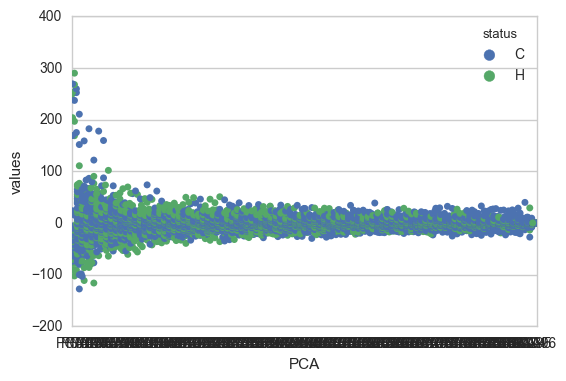

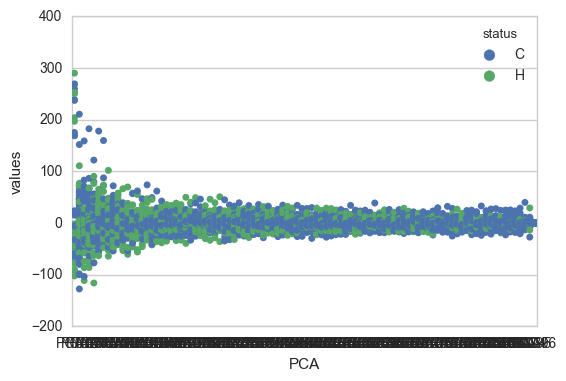

In [31]:
############### PCA swarmplot/Stripplot tester (FOR ALL PCA)

f, ax = plt.subplots()
ax = sns.swarmplot(x='PCA', y='values', hue='status', data=pca)
f, ax1 = plt.subplots()
ax1 = sns.stripplot(x='PCA', y='values', hue='status', data=pca)

In [32]:
############### PCA swarmplot/Stripplot tester (FOR first 4 PCA)
A = pd.DataFrame(cols)
A['values'] = pd.DataFrame(transformed[:,0])
A['PCA'] = 'PCA' + str(1)
A['status'] = A[0].astype(str).str[0]

for i in range(4):
    A1 = pd.DataFrame(cols)
    A1['values'] = pd.DataFrame(transformed[:,i+1])
    A1['PCA'] = 'PCA' + str(i+2)
    A1['status'] = A1[0].astype(str).str[0]
    A = pd.concat([A,A1])

#A.to_csv('A.csv')
print(transformed[:,4])


[  -7.23059114    8.16210749   34.96979917   35.83160432  -76.97548558
  -26.1519113    49.27762954   -1.32624679    8.70789831  -12.60242316
   21.70515193   79.7035904    27.87081787  -27.30067977   56.38928111
   21.32812318  -22.18641846   13.06720233 -116.20645398  -44.3866448
   11.08846198   -2.93794146  -28.85449359  -23.25659076   -7.10032845
  -62.93815824   11.11720133   32.79166006   -1.88526     -77.09111832
  -57.67417854   -3.32414013   -9.19205148   -7.30833011  -11.34251304
   34.12665161   -0.40195108   -0.73563086    1.25911804  -24.87726608
    0.68901976   -3.44823706    9.69552737  -16.84586225   15.56010506
   90.30579579  -37.42371186   10.10060191   76.53595936    3.38097644
   42.57106613   31.00354963   43.00384469  -28.39056101  -58.18896928
   -6.47251408   25.53520462    3.00325261   22.30105089  -14.45645532
  -26.33173413  -40.04837945  121.74009471   -3.04909659   46.44984184
   17.9963643   -36.65282875   31.61128869   41.0010398    14.46663323
  -19.0

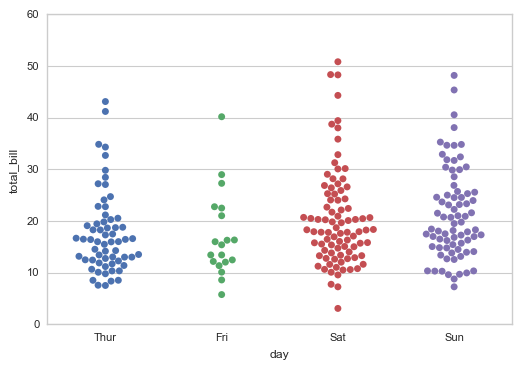

In [133]:
###################################### SEABORN TESTER
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="day", y="total_bill", data=tips)